In [57]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
os.chdir(r'C:\Users\ADMIN\Desktop\STL internship')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [58]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [59]:
cur_path

'c:\\Users\\ADMIN\\Desktop\\STL internship'

In [60]:
for i in range(classes):
    path = os.path.join(cur_path, 'train', str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\' + a)
            image = image.resize((30,30))
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

In [61]:
data = np.array(data)
labels = np.array(labels)

In [62]:
np.save('./training/data', data)
np.save('./training/target', labels)

In [63]:
data = np.load('./training/data.npy')
labels = np.load('./training/target.npy')

In [64]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [65]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [66]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [67]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [80]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [81]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [82]:
epochs = 30
history = model.fit(x_train, y_train, batch_size=32, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 85s 78ms/step - accuracy: 0.1688 - loss: 3.4477 - val_accuracy: 0.6993 - val_loss: 1.2855
Epoch 2/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 84s 86ms/step - accuracy: 0.5951 - loss: 1.4658 - val_accuracy: 0.9046 - val_loss: 0.4532
Epoch 3/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 85s 86ms/step - accuracy: 0.7824 - loss: 0.7776 - val_accuracy: 0.9603 - val_loss: 0.2215
Epoch 4/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 77s 79ms/step - accuracy: 0.8615 - loss: 0.4831 - val_accuracy: 0.9805 - val_loss: 0.1147
Epoch 5/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 73s 75ms/step - accuracy: 0.9007 - loss: 0.3456 - val_accuracy: 0.9865 - val_loss: 0.0746
Epoch 6/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 73s 74ms/step - accuracy: 0.9299 - loss: 0.2425 - val_accuracy: 0.9901 - val_loss: 0.0482
Epoch 7/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 77s 79ms/step - accuracy: 0.9491 - loss: 0.1824 - val_accuracy: 0.9925 - val_loss: 0.0414
Epoch 8/30
981/981 ━━━━━━━━━━━━━━━━━━━━ 73s 74ms/step - accuracy: 0.9567 - loss: 0.1515 - 

<function matplotlib.pyplot.show(close=None, block=None)>

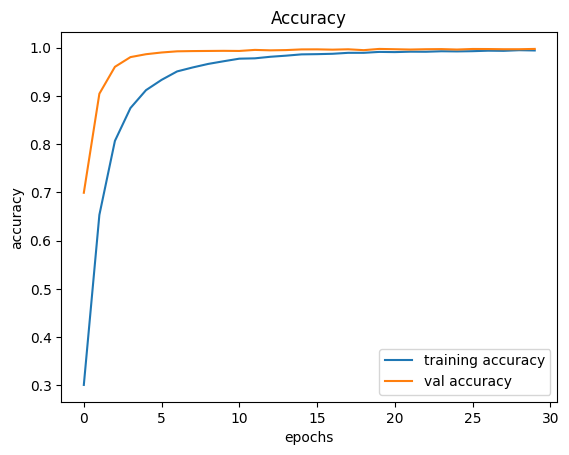

In [83]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title("Accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show

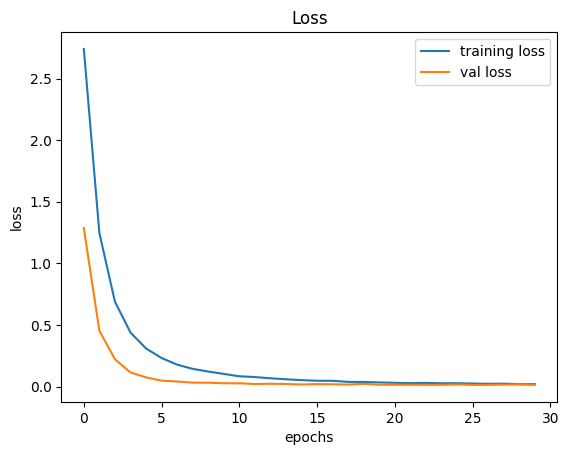

In [84]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [86]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    x_test = np.array(data)
    return x_test, label

In [87]:
x_test, label = testing('Test.csv')

In [88]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_classes

395/395 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step


array([16,  1, 38, ...,  5,  7, 10], dtype=int64)

In [89]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, y_pred_classes))

0.9786223277909739


In [90]:
model.save("./training/TSR.h5")

In [5]:
import streamlit as st
import cv2
import pandas as pd
import tensorflow as tf
from ipywidgets import FileUpload, VBox, Button, Output
from IPython.display import display, clear_output
import os
os.chdir(r'C:\Users\ADMIN\Desktop\STL internship')
from keras.models import load_model
model = load_model('./training/TSR.h5')
model_path = './training/TSR.h5'
test_csv_path = 'Test.csv'

In [7]:
classes = { 
    0:'Speed limit (20km/h)',
    1:'Speed limit (30km/h)',
    2:'Speed limit (50km/h)',
    3:'Speed limit (60km/h)',
    4:'Speed limit (70km/h)',
    5:'Speed limit (80km/h)',
    6:'End of speed limit (80km/h)',
    7:'Speed limit (100km/h)',
    8:'Speed limit (120km/h)',
    9:'No passing',
    10:'No passing vehicle over 3.5 tons',
    11:'Right-of-way intersection',
    12:'Priority road',
    13:'Yield',
    14:'Stop',
    15:'No vehicles',
    16:'vehicle > 3.5 tons prohibited',
    17:'No entry',
    18:'General caution',
    19:'Dangerous curve left',
    20:'Dangerous curve right',
    21:'Double curve',
    22:'Bumpy road',
    23:'Slippery road',
    24:'Road narrows on the right',
    25:'Road work',
    26:'Traffic signals',
    27:'Pedestrians',
    28:'Children crossing',
    29:'Bicycles crossing',
    30:'Beware of ice/snow',
    31:'Wild animals crossing',
    32:'End speed + passing limits',
    33:'Turn right ahead',
    34:'Turn left ahead',
    35:'Ahead only',
    36:'Go straight or right',
    37:'Go straight or left',
    38:'Keep right',
    39:'Keep left',
    40:'Roundabout mandatory',
    41:'End of no passing',
    42:'End no passing vehicle > 3.5 tons'
}

In [8]:
model = load_model(model_path)

In [9]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data = []
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    x_test = np.array(data)
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    return image, y_pred_classes

In [10]:
st.title("Traffic Sign Classification")
st.write("Upload an image of traffic sign to classify it.")

2024-06-22 01:21:08.449 
  command:

    streamlit run C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [11]:
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "png", "jpeg"])

In [12]:
if uploaded_file is not None:
    image, prediction = test_on_img(uploaded_file)
    s = [str(i) for i in prediction]
    a = int("".join(s))
    plt.imshow(image)
    st.write(f"Predicted traffic sign is: {classes[a]}")
    fig, ax = plt.subplots()
    ax.imshow(image)
    st.pyplot(fig)